In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_902638.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_487470.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_474380.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_499033.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_189829.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_648019.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_692135.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_985372.jpg
/kaggle/input/segmented-peripheral-blood-cells-using-opencv/binary_masks/binary_masks/monocyte/MO_168549.jpg
/kaggle/input/segme

In [2]:
base_path = "/kaggle/input/segmented-peripheral-blood-cells-using-opencv/original_images/original_images"

In [3]:
cell_types = [
    "basophil", "eosinophil", "erythroblast", 
    "lymphocyte", "ig", "monocyte", 
    "neutrophil", "platelet"
]

In [4]:
data = []

for cell_type in cell_types:
    folder_path = os.path.join(base_path, cell_type)
    if os.path.exists(folder_path):  
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):  
                data.append({"Image_Path": file_path, "Label": cell_type})

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

Image_Path     Label
0  /kaggle/input/segmented-peripheral-blood-cells...  basophil
1  /kaggle/input/segmented-peripheral-blood-cells...  basophil
2  /kaggle/input/segmented-peripheral-blood-cells...  basophil
3  /kaggle/input/segmented-peripheral-blood-cells...  basophil
4  /kaggle/input/segmented-peripheral-blood-cells...  basophil

In [7]:
df.tail()

Image_Path     Label
1555  /kaggle/input/segmented-peripheral-blood-cells...  platelet
1556  /kaggle/input/segmented-peripheral-blood-cells...  platelet
1557  /kaggle/input/segmented-peripheral-blood-cells...  platelet
1558  /kaggle/input/segmented-peripheral-blood-cells...  platelet
1559  /kaggle/input/segmented-peripheral-blood-cells...  platelet

In [8]:
df.shape

(1560, 2)

In [9]:
df.columns

Index(['Image_Path', 'Label'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Image_Path    0
Label         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  1560 non-null   object
 1   Label       1560 non-null   object
dtypes: object(2)
memory usage: 24.5+ KB


In [13]:
df.nunique()

Image_Path    1560
Label            8
dtype: int64

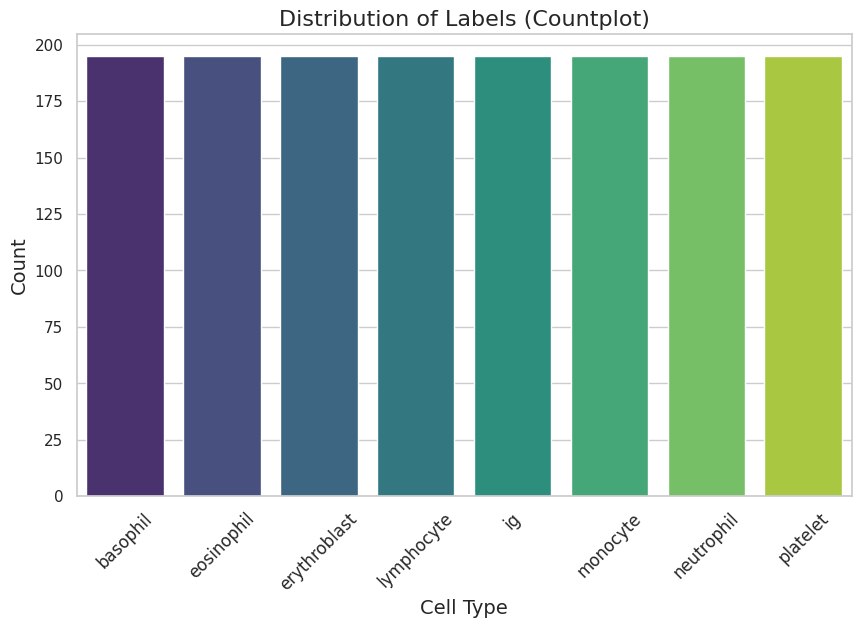

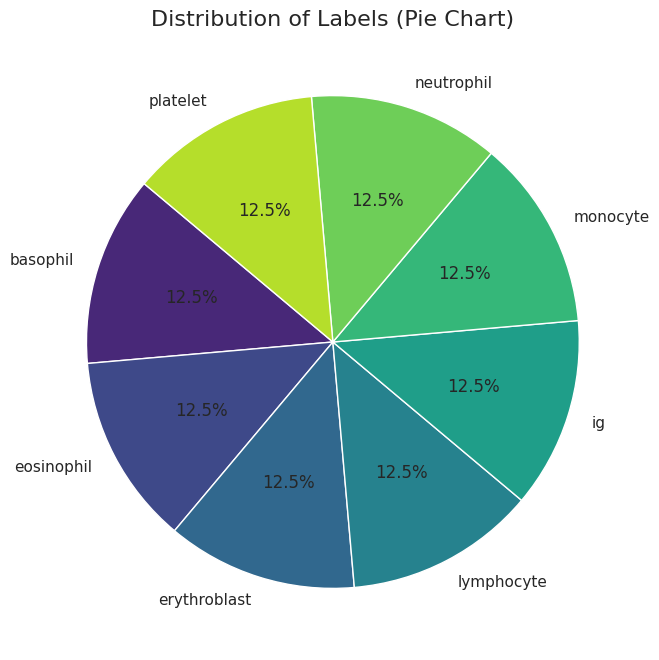

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Label", order=df['Label'].value_counts().index, palette="viridis")
plt.title("Distribution of Labels (Countplot)", fontsize=16)
plt.xlabel("Cell Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

plt.figure(figsize=(8, 8))
df['Label'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(df['Label'].unique()))
)
plt.title("Distribution of Labels (Pie Chart)", fontsize=16)
plt.ylabel("")  
plt.show()

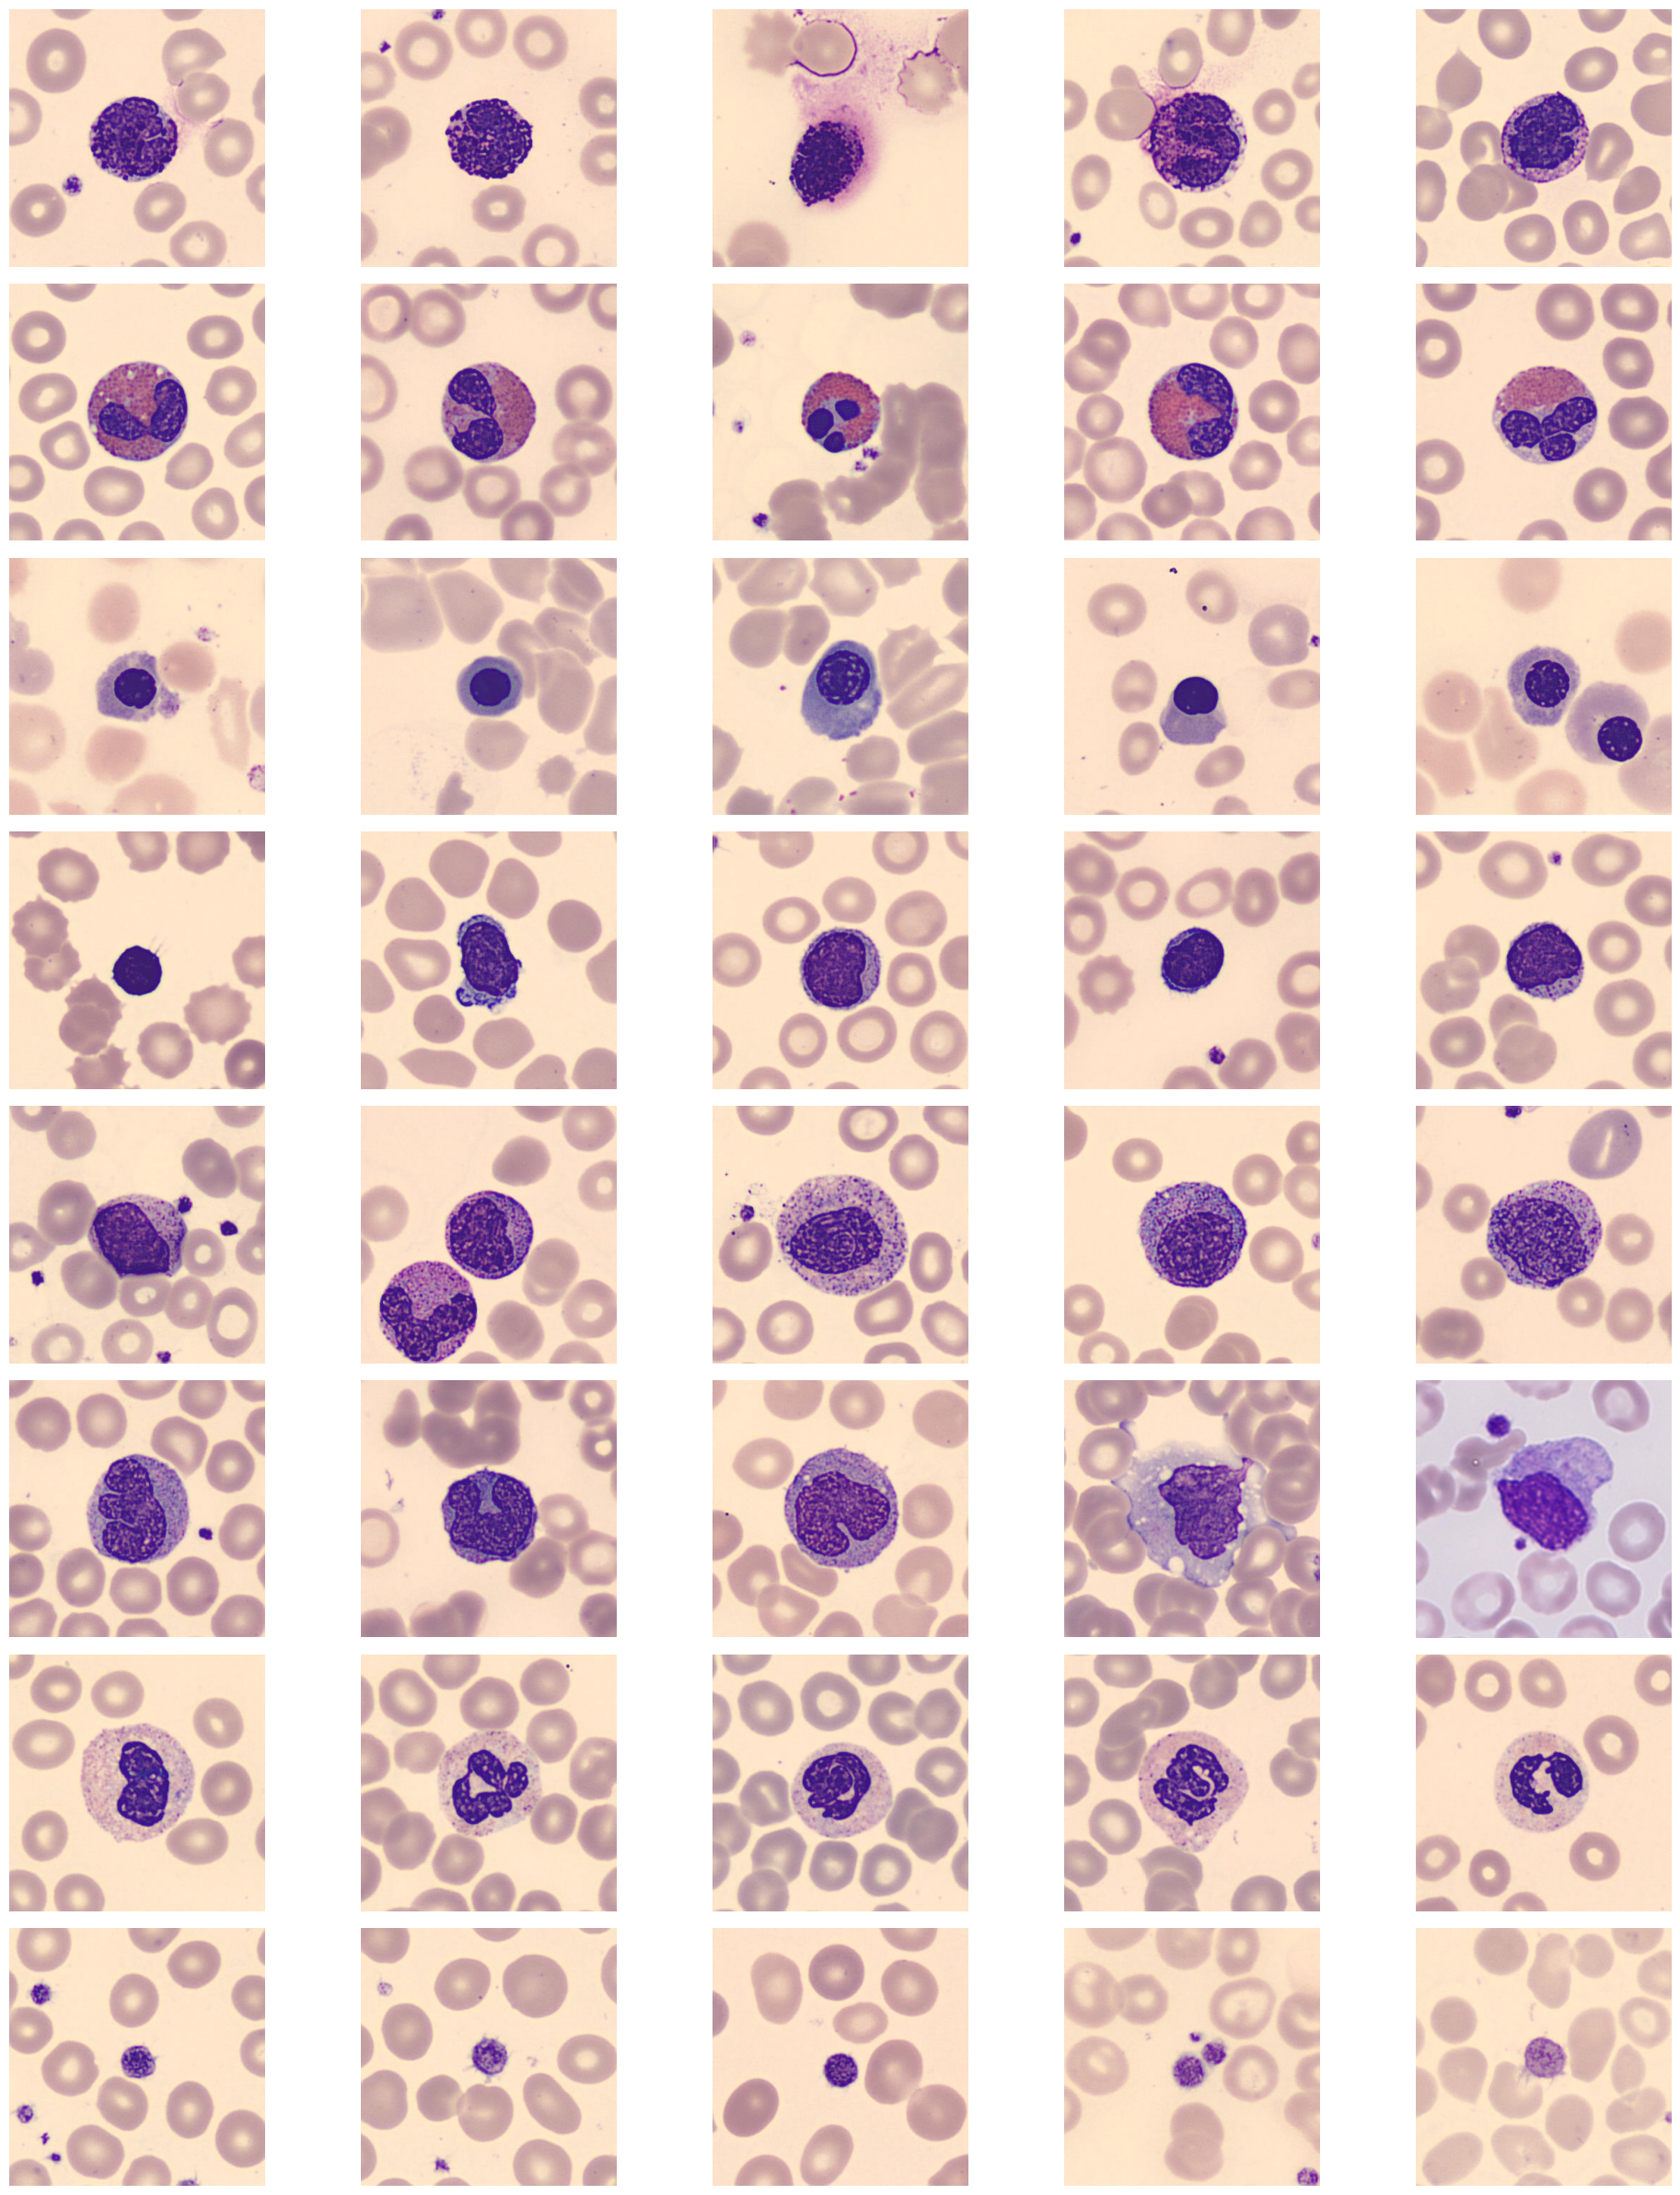

In [15]:
import cv2

samples_per_category = 5

plt.figure(figsize=(20, len(df['Label'].unique()) * 3))

for idx, label in enumerate(df['Label'].unique()):
    sample_images = df[df['Label'] == label].sample(n=samples_per_category, random_state=42)
    
    for i, img_path in enumerate(sample_images['Image_Path']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        
        plt.subplot(len(df['Label'].unique()), samples_per_category, idx * samples_per_category + i + 1)
        plt.imshow(img)
        plt.axis('off') 
        if i == 0: 
            plt.ylabel(label, fontsize=14)

plt.tight_layout()
plt.show()

In [16]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}


In [18]:
df['Label'] = df['Label'].astype(str)

In [26]:
train_df_new, temp_df_new = train_test_split(
    df,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df['Label']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['Label'] 
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (299, 299)  
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    df,
    x_col='Image_Path',
    y_col='Label',
    target_size=img_size,  
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='Image_Path',  
    y_col='Label',     
    target_size=img_size,  
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='Image_Path', 
    y_col='Label',    
    target_size=img_size,  
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 1560 validated image filenames belonging to 8 classes.
Found 156 validated image filenames belonging to 8 classes.
Found 156 validated image filenames belonging to 8 classes.


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Dropout, 
    BatchNormalization, GaussianNoise, Input, 
    MultiHeadAttention, Reshape
)
from tensorflow.keras.optimizers import Adam

def create_xception_model(input_shape, num_classes=8, learning_rate=0.0001):
    inputs = Input(shape=input_shape, name="Input_Layer")
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    base_model.trainable = False
    x = base_model.output
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels), name="Reshape_to_Sequence")(x)
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=channels, name="Multi_Head_Attention"
    )(x, x)
    attention_output = Reshape((height, width, channels), name="Reshape_to_Spatial")(attention_output)
    x = GaussianNoise(0.25, name="Gaussian_Noise_1")(attention_output)
    x = GlobalAveragePooling2D(name="Global_Avg_Pooling")(x)
    x = Dense(512, activation='relu', name="FC_512")(x)
    x = BatchNormalization(name="Batch_Normalization")(x)
    x = GaussianNoise(0.25, name="Gaussian_Noise_2")(x)
    x = Dropout(0.25, name="Dropout")(x)
    outputs = Dense(num_classes, activation='softmax', name="Output_Layer")(x)
    model = Model(inputs=inputs, outputs=outputs, name="Xception_with_Attention")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

input_shape = (299, 299, 3)
cnn_model = create_xception_model(input_shape, num_classes=8, learning_rate=0.0001)

In [29]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1732005568.241435     104 service.cc:145] XLA service 0x7d61000021c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732005568.241512     104 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732005568.241520     104 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732005578.071493     154 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_22', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1732005579.356891     153 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1048 bytes spill stores, 1044 bytes spill loads

I0000 00:00:1732005600.442817     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/98 ━━━━━━━━━━━━━━━━━━━━ 22s 395ms/step - accuracy: 0.4827 - loss: 1.6173

I0000 00:00:1732005625.398933     190 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1048 bytes spill stores, 1044 bytes spill loads

I0000 00:00:1732005626.614404     192 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_22', 228 bytes spill stores, 228 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.5760 - loss: 1.2978

I0000 00:00:1732005676.594767     223 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1048 bytes spill stores, 1044 bytes spill loads

I0000 00:00:1732005676.761677     222 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6', 228 bytes spill stores, 228 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 128s 920ms/step - accuracy: 0.5771 - loss: 1.2940 - val_accuracy: 0.6346 - val_loss: 0.9835
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step - accuracy: 0.8400 - loss: 0.4493 - val_accuracy: 0.5577 - val_loss: 1.5934
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 440ms/step - accuracy: 0.8945 - loss: 0.2975 - val_accuracy: 0.8013 - val_loss: 0.8181
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 445ms/step - accuracy: 0.9271 - loss: 0.2308 - val_accuracy: 0.9295 - val_loss: 0.2474
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 434ms/step - accuracy: 0.9462 - loss: 0.1649 - val_accuracy: 0.6731 - val_loss: 1.7895


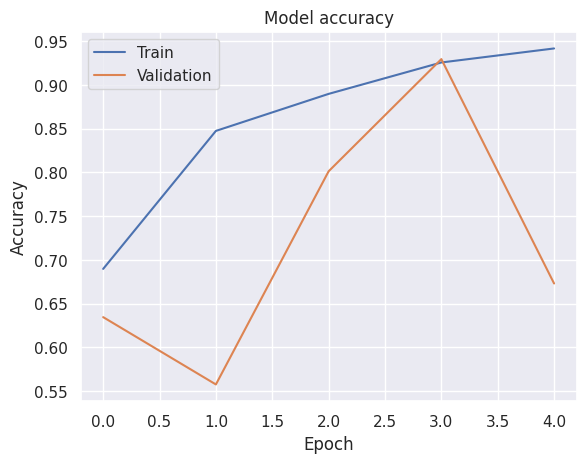

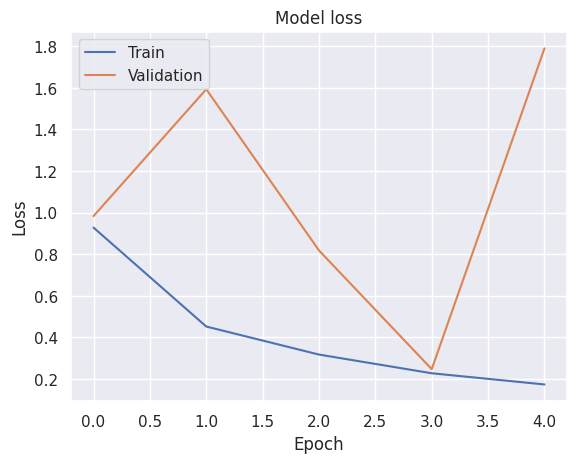

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step


In [32]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

    basophil       1.00      0.95      0.97        19
  eosinophil       1.00      1.00      1.00        19
erythroblast       0.83      0.95      0.88        20
          ig       0.89      0.85      0.87        20
  lymphocyte       0.95      1.00      0.98        20
    monocyte       0.78      0.95      0.86        19
  neutrophil       1.00      0.70      0.82        20
    platelet       1.00      1.00      1.00        19

    accuracy                           0.92       156
   macro avg       0.93      0.92      0.92       156
weighted avg       0.93      0.92      0.92       156



In [33]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

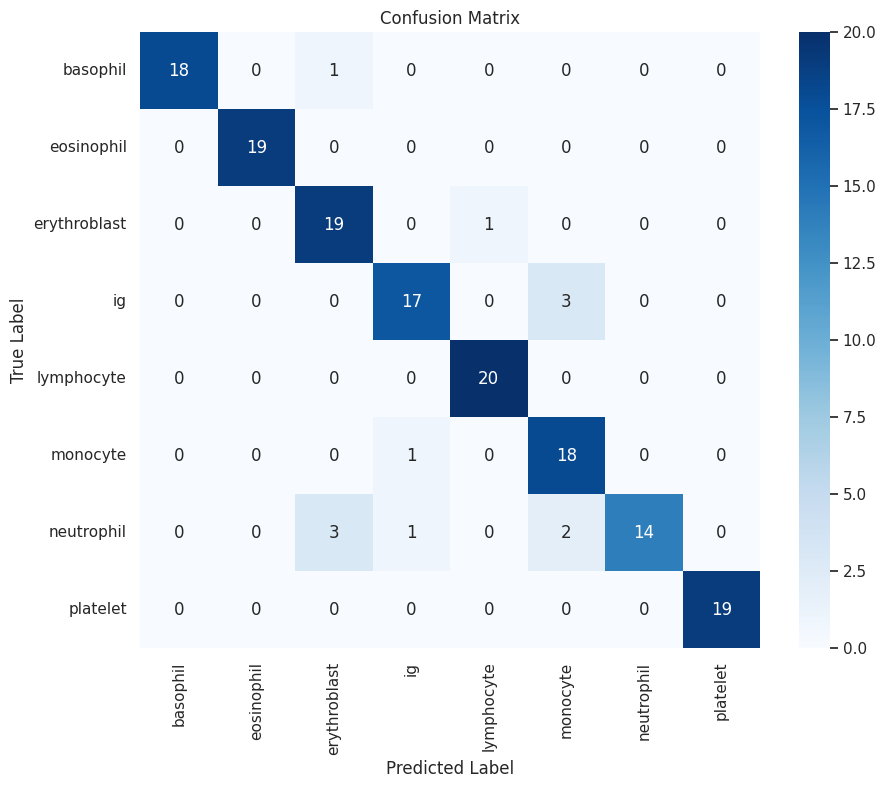

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Dropout, 
    BatchNormalization, GaussianNoise, Input, 
    MultiHeadAttention, Reshape
)
from tensorflow.keras.optimizers import Adam

def create_mobilenet_model(input_shape, num_classes=8, learning_rate=0.0001):
    inputs = Input(shape=input_shape, name="Input_Layer")
    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)
    base_model.trainable = False
    x = base_model.output
    height, width, channels = x.shape[1], x.shape[2], x.shape[3]
    x = Reshape((height * width, channels), name="Reshape_to_Sequence")(x)
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=channels, name="Multi_Head_Attention"
    )(x, x)
    attention_output = Reshape((height, width, channels), name="Reshape_to_Spatial")(attention_output)
    x = GaussianNoise(0.25, name="Gaussian_Noise_1")(attention_output)
    x = GlobalAveragePooling2D(name="Global_Avg_Pooling")(x)
    x = Dense(512, activation='relu', name="FC_512")(x)
    x = BatchNormalization(name="Batch_Normalization")(x)
    x = GaussianNoise(0.25, name="Gaussian_Noise_2")(x)
    x = Dropout(0.25, name="Dropout")(x)
    outputs = Dense(num_classes, activation='softmax', name="Output_Layer")(x)
    model = Model(inputs=inputs, outputs=outputs, name="MobileNet_with_Attention")
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

input_shape = (299, 299, 3)
cnn_model = create_mobilenet_model(input_shape, num_classes=8, learning_rate=0.0001)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5


I0000 00:00:1732006095.136559     337 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads

I0000 00:00:1732006097.291604     338 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_22', 228 bytes spill stores, 228 bytes spill loads



76/98 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.6056 - loss: 1.1295

I0000 00:00:1732006121.652588     366 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_22', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1732006123.447413     368 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.6410 - loss: 1.0324

I0000 00:00:1732006139.808604     400 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6', 228 bytes spill stores, 228 bytes spill loads

I0000 00:00:1732006140.981358     399 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1', 1300 bytes spill stores, 1284 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 412ms/step - accuracy: 0.6423 - loss: 1.0288 - val_accuracy: 0.8269 - val_loss: 0.5983
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9169 - loss: 0.2621 - val_accuracy: 0.9808 - val_loss: 0.1133
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9631 - loss: 0.1394 - val_accuracy: 0.7436 - val_loss: 0.7724
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.9687 - loss: 0.0951 - val_accuracy: 0.8910 - val_loss: 0.2956
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9812 - loss: 0.0591 - val_accuracy: 0.9808 - val_loss: 0.0500


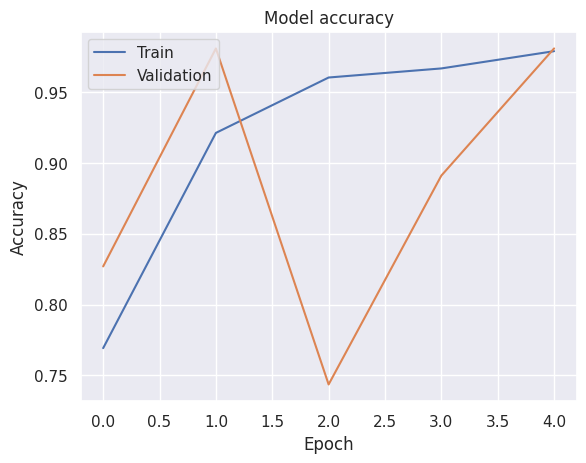

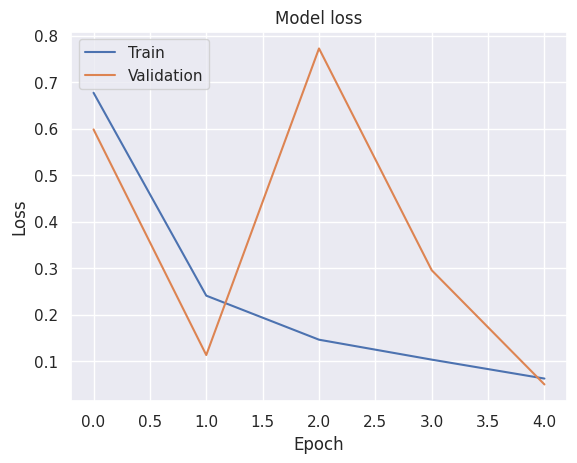

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step


In [39]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

    basophil       1.00      0.95      0.97        19
  eosinophil       1.00      1.00      1.00        19
erythroblast       1.00      1.00      1.00        20
          ig       1.00      0.95      0.97        20
  lymphocyte       1.00      1.00      1.00        20
    monocyte       0.90      1.00      0.95        19
  neutrophil       1.00      1.00      1.00        20
    platelet       1.00      1.00      1.00        19

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [40]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

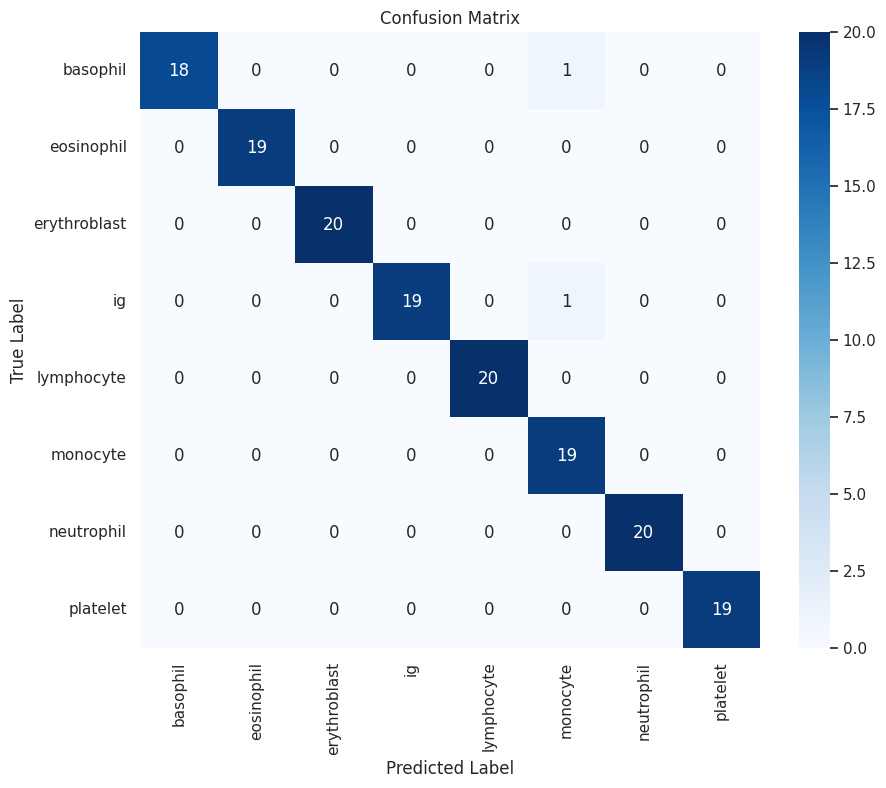

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

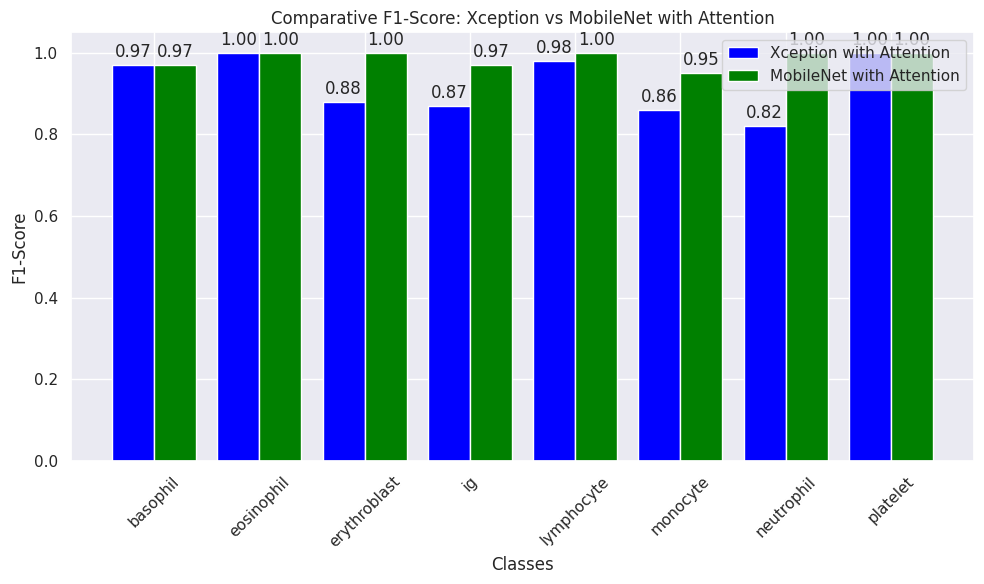

In [43]:
labels = ['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

xception_f1_scores = [0.97, 1.00, 0.88, 0.87, 0.98, 0.86, 0.82, 1.00]
mobilenet_f1_scores = [0.97, 1.00, 1.00, 0.97, 1.00, 0.95, 1.00, 1.00]

x = np.arange(len(labels))

plt.figure(figsize=(10, 6))

plt.bar(x - 0.2, xception_f1_scores, 0.4, label='Xception with Attention', color='blue')
plt.bar(x + 0.2, mobilenet_f1_scores, 0.4, label='MobileNet with Attention', color='green')

plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('Comparative F1-Score: Xception vs MobileNet with Attention')
plt.xticks(x, labels, rotation=45)
plt.legend()

for i in range(len(x)):
    plt.text(x[i] - 0.2, xception_f1_scores[i] + 0.01, f'{xception_f1_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + 0.2, mobilenet_f1_scores[i] + 0.01, f'{mobilenet_f1_scores[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()